In [5]:
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (212 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

In [6]:
import pdf2image
from pdf2image import convert_from_path
import pytesseract
import numpy as np
import pandas as pd
import cv2
from PIL import Image

In [7]:
pages = convert_from_path(r'/content/drive/Othercomputers/My Mac/med-proj/backend/notebooks/patient_details/pd_1.pdf')

In [8]:
len(pages) #PIL image -> from pillow python module

2

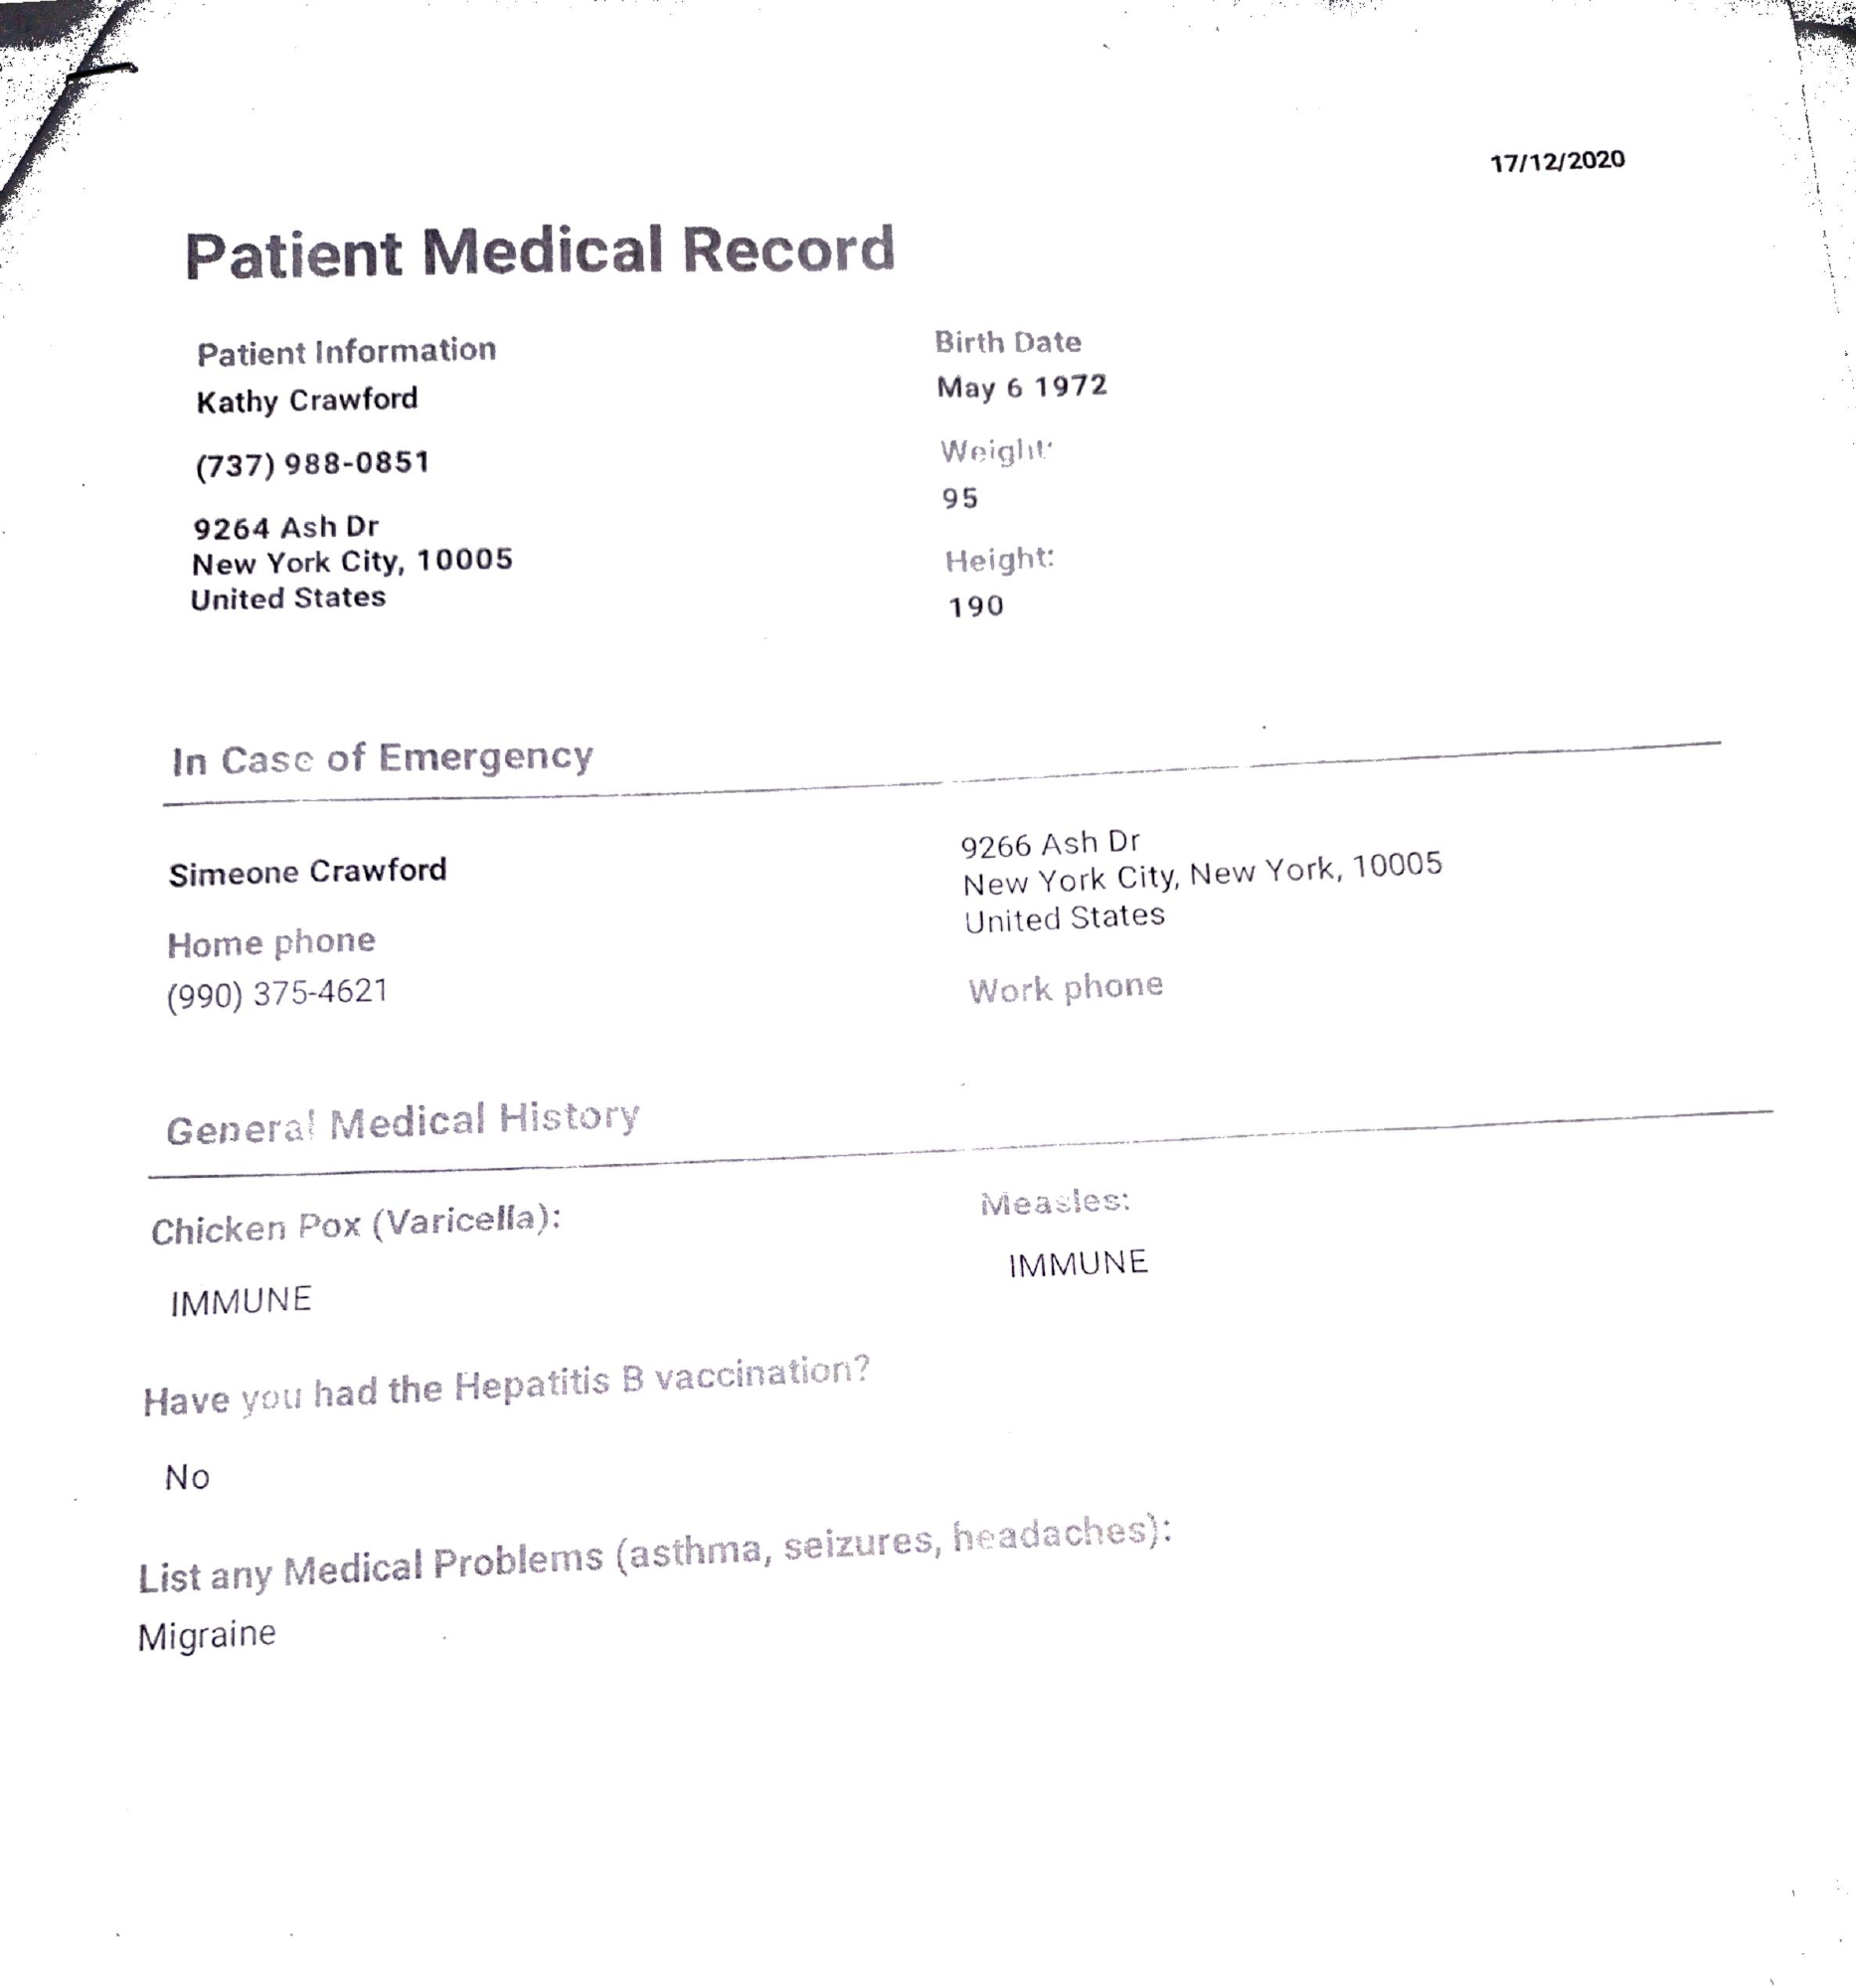

In [9]:
pages[0]

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(pages[0], lang='eng') #pages[0] -> the image
print(text)

 

47112/2020

 

Patient Medical Record

 

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight’
9264 Ash Dr 95
New York City, 10005 .
United States Height:
190
In Case of Emergency
a _ a _
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History
. : a ee

 

Chicken Pox (Varicella):

IMMUNE

Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches):

Migraine



In [11]:
import numpy as np

def preprocess_image(img): #preprocess the og image before running tesseract-ocr engine to extract data
  gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY) #converts img to grayscale
  resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR) #size factor -> better results
  processed_image = cv2.adaptiveThreshold(
      resized,
      255,
      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
      cv2.THRESH_BINARY,
      61,
      11
  )
  return processed_image

In [12]:
import numpy as np

def preprocess_image(img): #preprocess the og image before running tesseract-ocr engine to extract data
  gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY) #converts img to grayscale
  resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR) #size factor -> better results
  processed_image = cv2.adaptiveThreshold(
      resized,
      255,
      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
      cv2.THRESH_BINARY,
      61,
      11
  )
  return processed_image

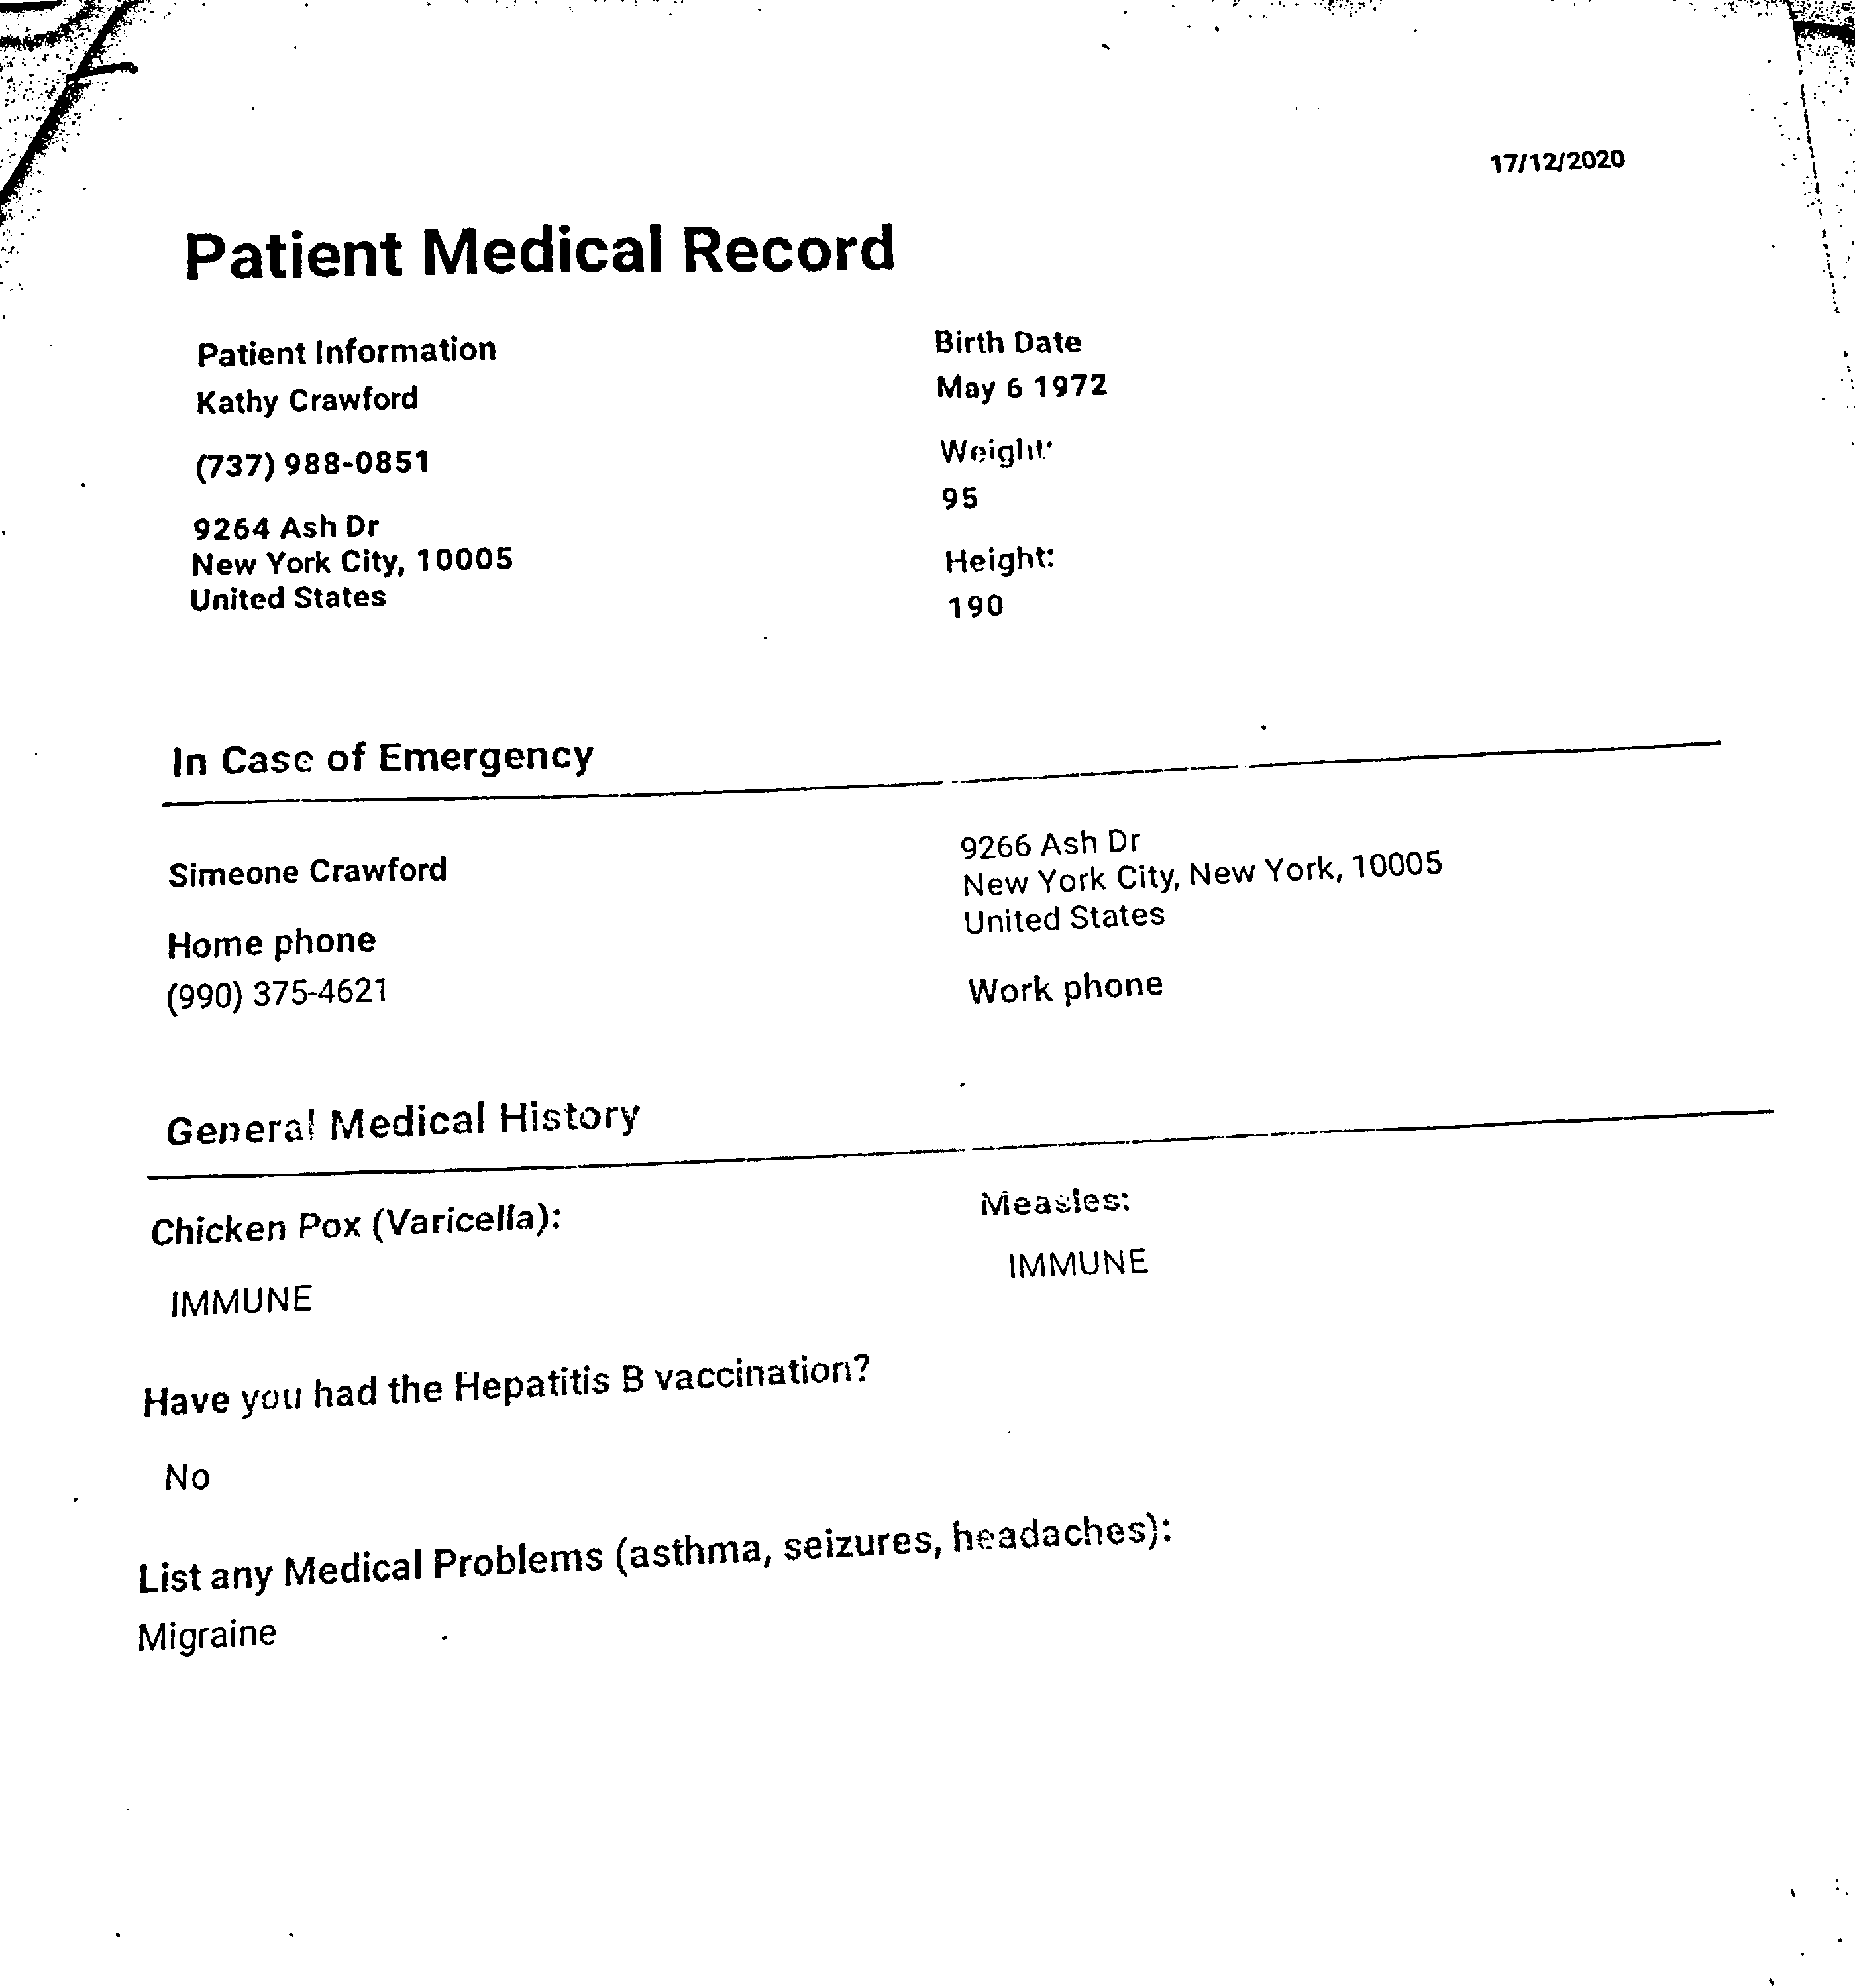

In [13]:
img = preprocess_image(pages[0])
Image.fromarray(img)

In [14]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
text = pytesseract.image_to_string(img, lang='eng') #pages[0] -> the image
print(text)

17/12/2020

 

Patient Medical Record

 

 

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight’
9264 Ash Dr 95
New York City, 10005 '
United States Height:
190
In Casc of Emergency
SC ee
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone

Genera! Medical History

nn

me

nh ee A OE i ne

Chicken Pox (Varicella): Measies:

IMMUNE IMMUNE

Have you had the Hepatitis B vaccination?
No

List any Medical Problems (asthma, seizures, headaches}:

Migraine

 

be

C
mat
Lh
oo



In [15]:
import re

In [16]:
pattern = 'Patient Information(.*?)\(\d{3}\)'

matches = re.findall(pattern, text, flags = re.DOTALL)
matches #list of matches

[' Birth Date\nKathy Crawford May 6 1972\n']

In [17]:
matches[0].strip()

'Birth Date\nKathy Crawford May 6 1972'

In [18]:
match = matches[0].replace("Birth Date", " ").strip()
match

'Kathy Crawford May 6 1972'

In [19]:
pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'

date_matches = re.findall(pattern, match)
date = date_matches[0][0]
date

'May 6 1972'

In [20]:
match.replace(date, ' ').strip()

'Kathy Crawford'

**Extract name**

In [21]:
def remove_noise_from_name(name):
  name = name.replace('Birth Date', ' ').strip()
  date_pattern = '((Jan|Feb|March|April|May|June|July|Aug|Sep|Oct|Nov|Dec)[ \d]+)'
  date_matches = re.findall(date_pattern, name)

  if date_matches:
    date = date_matches[0][0]
    name = name.replace(date, '').strip()

  return name

In [22]:
name = '\n\n \n\n \n\nBirth Date\nKathy Crawford May 6 1972\n'

name = remove_noise_from_name(name)
name

'Kathy Crawford'

**Extract Phone Number**

In [23]:
pattern = 'Patient Information(.*?)(\(\d{3}\) \d{3}-\d{4})'

matches = re.findall(pattern, text, flags=re.DOTALL)
matches

[(' Birth Date\nKathy Crawford May 6 1972\n', '(737) 988-0851')]

In [24]:
matches[0][1]

'(737) 988-0851'

**Extract Vaccine**

In [25]:
pattern = 'Have you had the Hepatitis B vaccination\?.*(Yes |No)'

matches = re.findall(pattern, text, flags=re.DOTALL)
matches[0]

'No'

***Extract Medical Problems**